In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
# Load the Titanic dataset
df = pd.read_csv("train.csv")

# Show the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# Overview of dataset
df.info()

# Statistical summary
df.describe()

# Checking for missing values
df.isnull().sum()

# Value counts of categorical features
df['Survived'].value_counts()
df['Sex'].value_counts()
df['Pclass'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [59]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  

# Confirm again
df.isnull().sum()

C:\Users\RAJ JAISWAL\AppData\Local\Temp\ipykernel_19232\2837809520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\RAJ JAISWAL\AppData\Local\Temp\ipykernel_19232\2837809520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

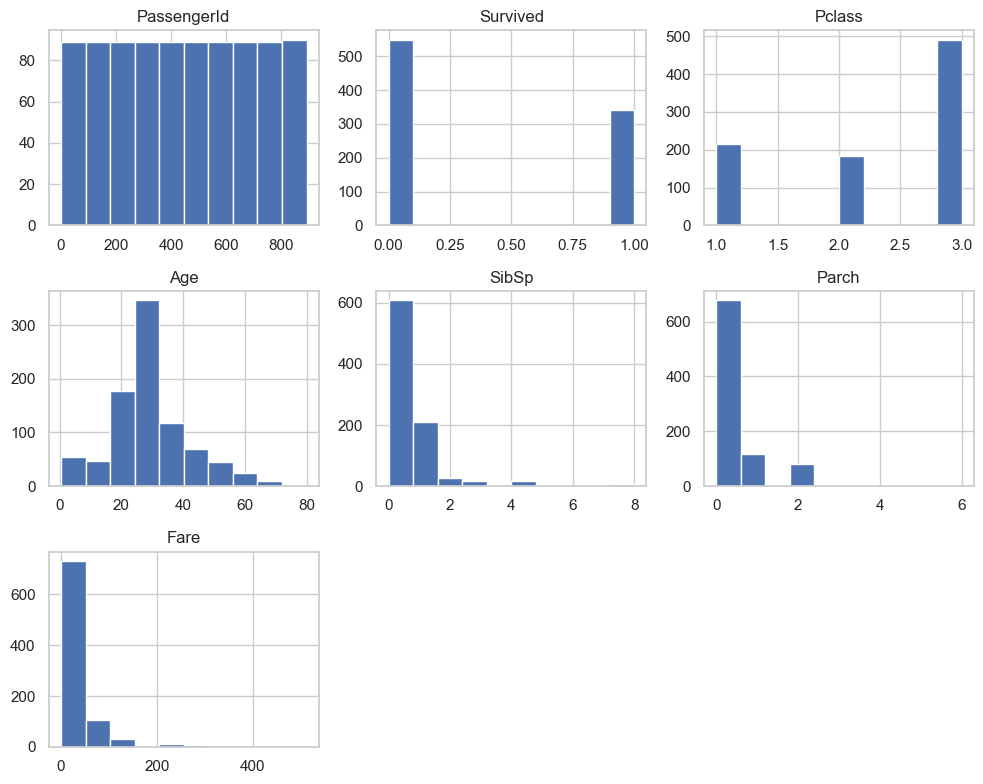

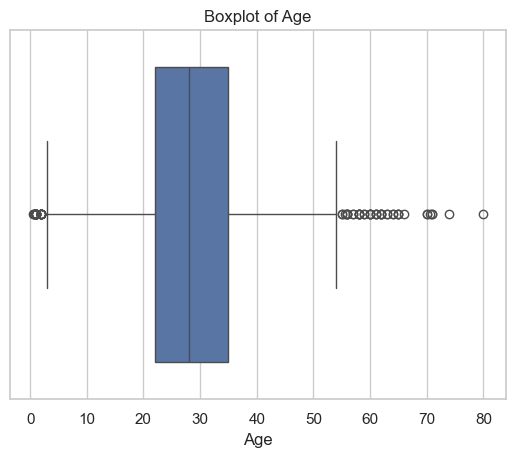

In [60]:
# Distribution of numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot of Age
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Age')
plt.show()

Observation: Distribution of Numerical Columns

- **Age** is roughly normally distributed but slightly skewed, with most passengers between **20 and 40 years** old.
- **Fare** is highly skewed to the right — most passengers paid low fares, but a few paid very high amounts (outliers).
- **SibSp** and **Parch** are heavily skewed toward 0, meaning most passengers had no siblings/spouses or parents/children aboard.
- **Pclass** shows that most passengers were in **3rd class**, followed by 1st and 2nd.
- These distributions help understand feature behavior and outliers before modeling.

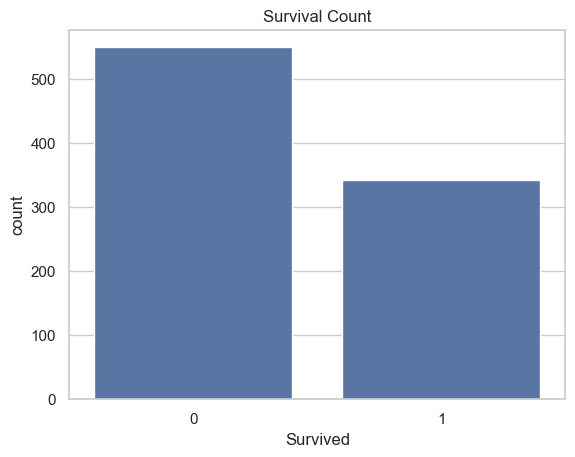

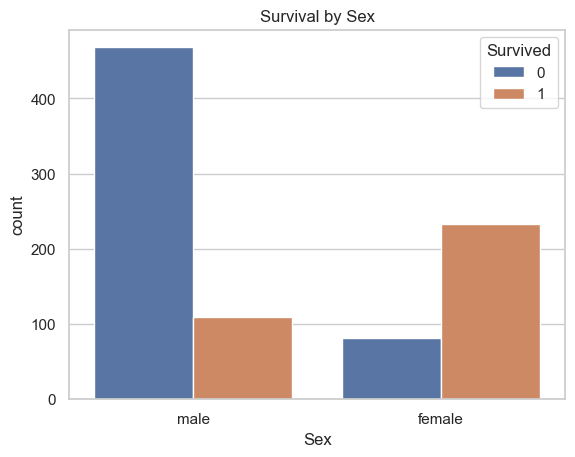

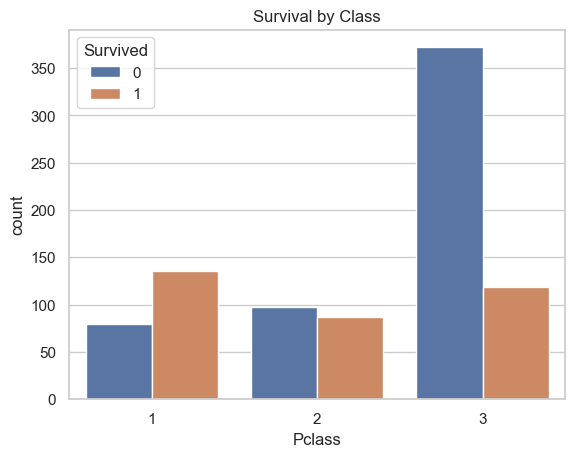

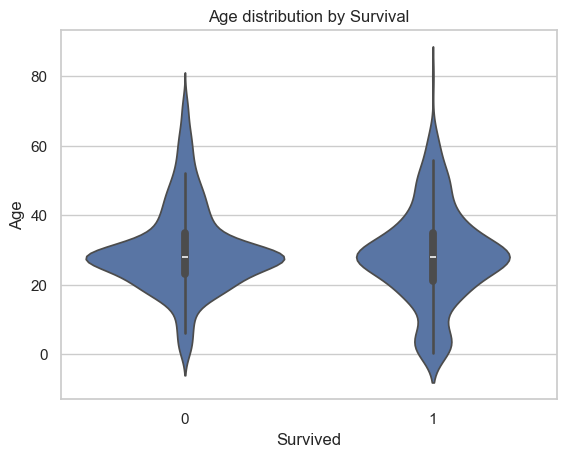

In [61]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

# Age distribution by Survival
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age distribution by Survival")
plt.show()

1. Observation: Survival Count
- The number of passengers who **did not survive (0)** is nearly **double** compared to those who did (1).
- This highlights the **high fatality rate** of the Titanic disaster — only about **38% survived**.

2. Observation: Survival by Sex
- **Females had a much higher survival rate** compared to males.
- The majority of males did **not survive**, while most females **did survive**.
- This supports the historical "women and children first" rescue policy used on the Titanic.

3. Observation: Survival by Class 
- **1st-class passengers** had the highest survival rate.
- **3rd-class passengers** had the **lowest chance** of survival.
- This suggests that **socioeconomic status** played a major role in survival.

4. Observation: Age Distribution by Survival 
- **Survivors tend to be younger**, with many children and young adults surviving.
- Non-survivors show a more spread-out age distribution.
- A few **elderly passengers** survived, but they are rare.
- The violin plot shows that **age played a role**, but not as strong as sex or class.

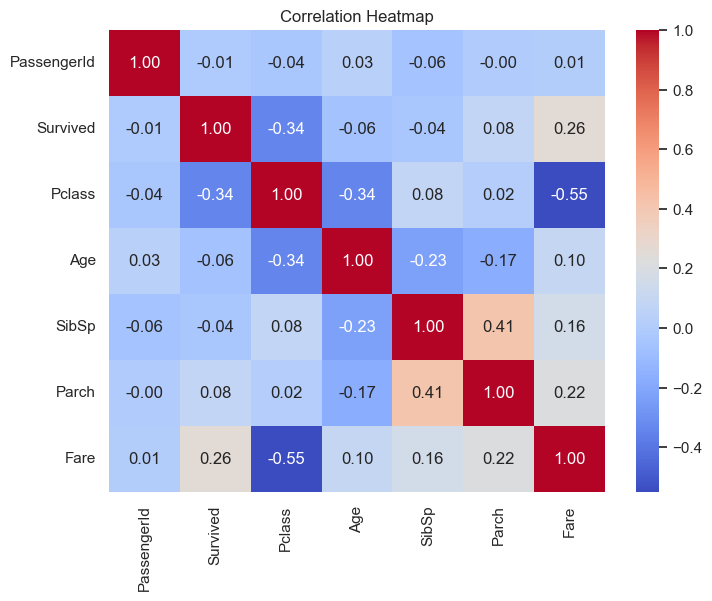

In [62]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Observation: Correlation Heatmap
- **Pclass** and **Fare** show moderate correlation (negative) — higher class passengers paid more.
- **Survived** has moderate positive correlation with **Fare**, and weak negative correlation with **Pclass**.
- **Age** has weak or no strong correlation with other numeric features.
- No extremely strong correlations exist between variables, which helps reduce multicollinearity.


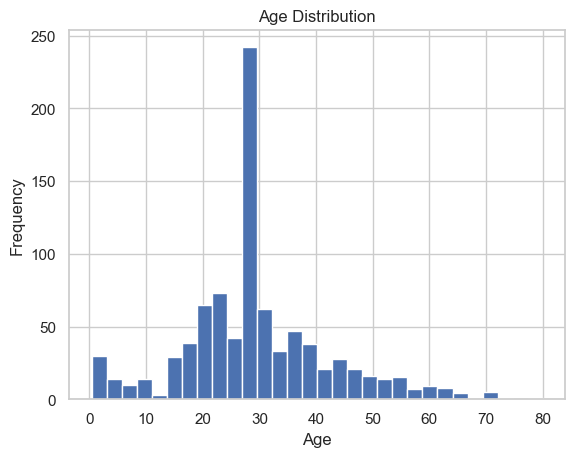

In [63]:
df['Age'].plot(kind='hist', bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

Observation: Age Distribution

- Most passengers were between 20–40 years old.
- There are fewer passengers in the older age groups (60+).
- Some missing values might have been present before cleaning.


## -> Summary of Findings

- **Pclass, Fare, and Sex** are the most influential features related to survival.
- Higher-class passengers and those who paid more were more likely to survive.
- **Younger passengers** also had slightly higher survival rates.
- Pairplot and heatmap visuals helped reveal trends and weak/strong correlations.
- The data was cleaned for missing values and prepared for further modeling if needed.
